# Machine Learning Modelling with CNN
**In this section taking we are going to code for  the image recognition system using the data prepared from previous section.**


****
****
**IN this section we are going to use advanced CNN architectures**


1.   Inception Model(self coded)
2.   Fully connected with few convolutional layer


****

**we have divided our data in 10 batches so as to decrease the computational cost.
we will train the model on 9 batches and test on 1 batch so as to confirm that model is working as expected.**
**we'll save the model for further reference.**



In [0]:
#Loading the dataset
##loading the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Upload the Kaggle credentials
from google.colab import files
files.upload()

In [0]:
##File configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

##downloading the dataset
!pip install kaggle
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

##unzipping
!unzip az-handwritten-alphabets-in-csv-format.zip
##unzippig further
!unzip 'A_Z Handwritten Data.zip'

##Loading the dataset
df = pd.read_csv('A_Z Handwritten Data.csv')

## its time to convert the dataframe in to images of size 28X28X1 as it is gray scaled
from keras.utils import np_utils
X = df.iloc[:,1:].values
y = np_utils.to_categorical(df['0'],num_classes = 26)
print(y)

## resizing 
X = X.astype('float32')
X = X/255.0

X = X.reshape(-1,28,28,1)
print(X.shape)


##creating the batches of the data
##We are going to create 10 batches
##For inputs (9 training batch and 1 testing batch)
batch_1,batch_2,batch_3,batch_4,batch_5,batch_6,batch_7,batch_8,batch_9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26,b27,b28,b29,x_test = np.split(X,30)

##For Outputs
y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y_test = np.split(y,30)

del df

az-handwritten-alphabets-in-csv-format.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  az-handwritten-alphabets-in-csv-format.zip
replace A_Z Handwritten Data.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  A_Z Handwritten Data.zip
replace A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
##importing the necessary dependencies
import tensorflow as tf
import keras        # sorry 

'''
our only dependeny is tensorflow .

'''

'\nour only dependeny is tensorflow .\n\n'

In [0]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()



In [1]:
#from google.colab import files
#files.upload()

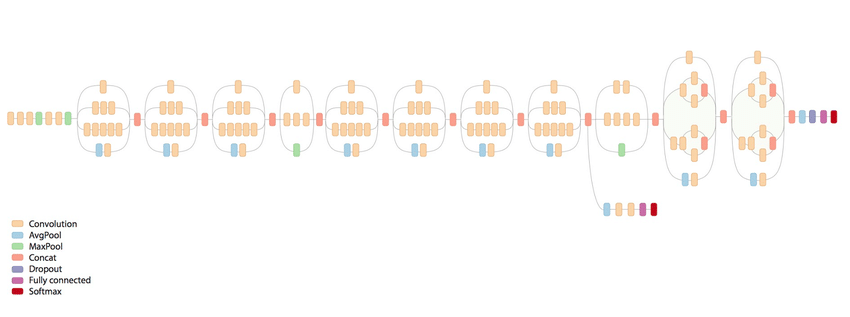

In [5]:
from IPython.display import Image
Image('inception2.png')

In [2]:
#from google.colab import files
#files.upload()

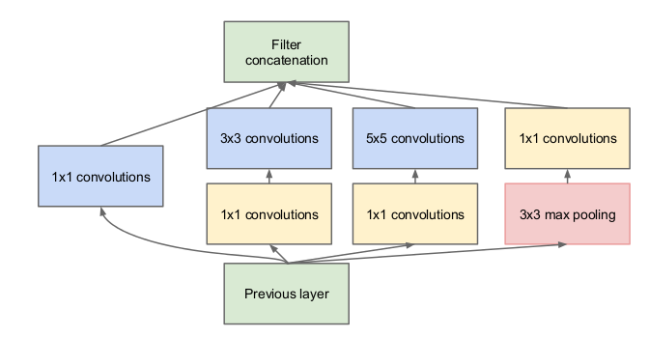

In [7]:
from IPython.display import Image
Image('inception_implement.png')

# Background
**This is the general architecture of Inception model**
****
**The self coded inception model which we are going to use will follow the same architecture
It will be having just 2 layers of inception.**


1.   1X1 filters,3X3 filters ,5X5 filters,Avg_pooling layers
2.   each subsequent filters are connected by 1X1 filters to reduce the computational cost.

****
Source Udacity:--
**Notice that we get the variety of convolutions that we want; specifically, we will be using 1×1, 3×3, and 5×5 convolutions along with a 3×3 max pooling.  If you’re wondering what the max pooling is doing there with all the other convolutions, we’ve got an answer: pooling is added to the Inception module for no other reason than, historically, good networks having pooling.  The larger convolutions are more computationally expensive, so the paper suggests first doing a 1×1 convolution  reducing the dimensionality of its feature map, passing the resulting feature map through a relu, and then doing the larger convolution (in this case, 5×5 or 3×3). The 1×1 convolution is key because it will be used to reduce the dimensionality of its feature map. **

****
*If you want more clarity then you must visit deeplearning.ai or anderw ng's deep learning course.*




In [0]:
##implementation of Imception Model

def Inception_Model(X,keep_prob,second_inception_layer = False):


    # one layer of inception
    filter1 = tf.Variable(tf.truncated_normal(shape=[1, 1, 1, 96], mean=0, stddev=0.08))     # 1X1 filter having 96 channels
    filter2 = tf.Variable(tf.truncated_normal(shape = [3,3,96,96],mean = 0,stddev  =0.08))   # 3X3 filter having 96 channels 

    in_layer1 = tf.nn.conv2d(X, filter1, strides=[1, 1, 1, 1], padding='SAME')               # same convolution
    in_layer2 = tf.nn.conv2d(in_layer1, filter2, strides=[1, 1, 1, 1], padding='SAME')       # same convolution

    in_layer2 = tf.nn.relu(in_layer2)                                                        # Relu Activation (Recommended)
    inception1 = tf.layers.batch_normalization(in_layer2)                                    # batch normalization for better outcome

    # 2nd parallel layer of inception
    filter3 = tf.Variable(tf.truncated_normal(shape=[1, 1, 1, 32], mean=0, stddev=0.08))
    filter4 = tf.Variable(tf.truncated_normal(shape=[5, 5,32, 32], mean=0, stddev=0.08))     # 5X5 filters having 32 channels

    in_layer3 = tf.nn.conv2d(X, filter3, strides=[1, 1, 1, 1], padding='SAME')
    in_layer4 = tf.nn.conv2d(in_layer3, filter4, strides=[1, 1, 1, 1], padding='SAME')

    in_layer4 = tf.nn.relu(in_layer4)
    inception2 = tf.layers.batch_normalization(in_layer4)

    inception2 = tf.layers.dropout(inception2,keep_prob)                                     # Dropout used to reduce overfitting

    # 3rd parallel layer of inception

    filter5 = tf.Variable(tf.truncated_normal(shape=[1, 1, 1, 96], mean=0, stddev=0.08))

    in_layer5 = tf.nn.conv2d(X, filter5, strides=[1, 1, 1, 1], padding='SAME')

    in_layer5 = tf.nn.relu(in_layer5)
    inception3 = tf.layers.batch_normalization(in_layer5)

    inception3 = tf.layers.dropout(inception3,keep_prob)

    # 4th parallel layer of max_pooling
    inception4_pool = tf.nn.max_pool(X, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')  # we can use avg_pooling.
    # Applying 1X1 convolution to the pooled version
    filter6 = tf.Variable(tf.truncated_normal(shape=[1, 1, 1, 32], mean=0, stddev=0.08))

    in_layer6 = tf.nn.conv2d(inception4_pool, filter6, strides=[1, 1, 1, 1], padding='SAME')
    # Relu activation
    in_layer6 = tf.nn.relu(in_layer6)
    # batch normalization
    inception4 = tf.layers.batch_normalization(in_layer6)

    # Concatenation of the result

    inception = keras.layers.concatenate([inception1,inception2,inception3,inception4],axis = 3)
    print(inception.shape)


    '''
    2nd inception layer
    
    following same architecture
    '''
    
    # Incase we are just ok with the only layer(In that case we need to modify fully_connected function)
    
    if second_inception_layer == True:

        filter21 = tf.Variable(tf.truncated_normal(shape = [1,1,256,512],mean = 0,stddev = 0.08))
        filter22 = tf.Variable(tf.truncated_normal(shape = [3,3,512,512],mean = 0,stddev=0.09))

        in2_layer1 = tf.nn.conv2d(inception,filter21,strides = [1,1,1,1],padding = 'SAME')
        in2_layer2 = tf.nn.conv2d(in2_layer1,filter22,strides = [1,1,1,1],padding = 'SAME')

        in2_layer2 = tf.nn.relu(in2_layer2)

        inception21 = tf.layers.batch_normalization(in2_layer2)

        inception21 = tf.layers.dropout(inception21,keep_prob)

        # 2nd parallel layer
        filter23 = tf.Variable(tf.truncated_normal(shape = [1,1,256,256],mean = 0,stddev = 0.08))
        filter24 = tf.Variable(tf.truncated_normal(shape = [5,5,256,256],mean = 0,stddev= 0.08))

        in2_layer3 = tf.nn.conv2d(inception,filter23,strides = [1,1,1,1],padding = 'SAME')
        in2_layer4 = tf.nn.conv2d(in2_layer3,filter24,strides = [1,1,1,1],padding = 'SAME')

        in2_layer4 =  tf.nn.relu(in2_layer4)

        inception22 = tf.layers.batch_normalization(in2_layer4)

        inception22 = tf.layers.dropout(inception22,keep_prob)

        # 3rd parallel layer
        filter25 = tf.Variable(tf.truncated_normal(shape = [1,1,256,256],mean = 0,stddev = 0.08))

        in2_layer5 = tf.nn.conv2d(inception,filter25, strides  =[1,1,1,1],padding = 'SAME')

        in2_layer5 = tf.nn.relu(in2_layer5)

        inception23 = tf.layers.batch_normalization(in2_layer5)

        inception23 = tf.layers.dropout(inception23,keep_prob)

        # 4th parallel avg pooling layer
        inception24_pool = tf.nn.max_pool(inception, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
        # Applying 1X1 convolution to the pooled version
        filter26 = tf.Variable(tf.truncated_normal(shape=[1, 1, 256, 256], mean=0, stddev=0.08))

        in2_layer6 = tf.nn.conv2d(inception24_pool, filter26, strides=[1, 1, 1, 1], padding='SAME')
        # Relu activation
        in2_layer6 = tf.nn.relu(in2_layer6)
        # batch normalization
        inception24 = tf.layers.batch_normalization(in2_layer6)


        # concatenation of the layers
        inception_layer = keras.layers.concatenate([inception21,inception22,inception23,inception24],axis = 3)

        print(inception_layer.shape)

        output = fully_connected(inception_layer,keep_prob)
        
        return output
        

    '''
    our dimension is 28X28X1280 
    and our original dataset has dimensions of 28X28X1
    '''


In [0]:
##Implementation of fully connected layers 
def fully_connected(inception_layers,keep_prob):

    # Moving with general convolutions
    gen_filter1 = tf.Variable(tf.truncated_normal(shape = [3,3,1280,1024],mean = 0,stddev=0.08))
    gen_filter2 = tf.Variable(tf.truncated_normal(shape = [3,3,1024,512],mean = 0,stddev=0.08))
    gen_filter3 = tf.Variable(tf.truncated_normal(shape=[3, 3,512,256], mean=0, stddev=0.08))

    # general convolution layer -1
    gen_conv1 = tf.nn.conv2d(inception_layers,gen_filter1,strides = [1,1,1,1],padding = 'SAME')
    gen_conv1 = tf.nn.relu(gen_conv1)
    pool_conv1 = tf.nn.max_pool(gen_conv1,ksize = [1,2,2,1],strides = [1,2,2,1],padding  = 'SAME')
    conv1 = tf.layers.batch_normalization(pool_conv1)

    # general convolution layer-2
    gen_conv2 = tf.nn.conv2d(conv1, gen_filter2, strides=[1, 1, 1, 1], padding='SAME')
    gen_conv2 = tf.nn.relu(gen_conv2)
    pool_conv2 = tf.nn.max_pool(gen_conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv2 = tf.layers.batch_normalization(pool_conv2)
    print(conv2.shape)

    # general convolution layer-3
    gen_conv3 = tf.nn.conv2d(conv2, gen_filter3, strides=[1, 1, 1, 1], padding='SAME')
    gen_conv3 = tf.nn.relu(gen_conv3)
    pool_conv3 = tf.nn.max_pool(gen_conv3, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv3 = tf.layers.batch_normalization(pool_conv3)
    print(conv3.shape)


    # fully connected layers
    flat =  tf.contrib.layers.flatten(conv3)
    print(flat.shape)

    # connection 1
    full1 = tf.contrib.layers.fully_connected(inputs = flat,
                                              num_outputs = 1024,
                                              activation_fn = tf.nn.relu)
    full1 = tf.nn.dropout(full1,keep_prob = keep_prob)
    full1 = tf.layers.batch_normalization(full1)

    # conncetion 2
    full2 = tf.contrib.layers.fully_connected(inputs=full1,
                                              num_outputs=512,
                                              activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob=keep_prob)
    full2 = tf.layers.batch_normalization(full2)

    # connection 3
    full3 = tf.contrib.layers.fully_connected(inputs=full2,
                                              num_outputs=128,
                                              activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob=keep_prob)
    full3 = tf.layers.batch_normalization(full3)

    # output layer
    output = tf.contrib.layers.fully_connected(inputs  = full3,
                                               num_outputs =  26,
                                               activation_fn = tf.nn.softmax)

    return output


In [7]:
## Hyperparameters

epochs = 10
keep_probability = 0.7
learning_rate = 0.01

## cost function and optimizers
logits = Inception_Model(x,keep_prob = keep_probability,second_inception_layer = True)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits,labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

##Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')


(?, 28, 28, 256)
(?, 28, 28, 1280)
(?, 7, 7, 512)
(?, 4, 4, 256)
(?, 4096)


In [0]:
x_batch = [batch_1,batch_2,batch_3,batch_4,batch_5,batch_6,batch_7,batch_8,batch_9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26,b27,b28,b29,]
y_batch = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29]

In [0]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    session.run(optimizer, 
                feed_dict={
                    x: feature_batch,
                    y: label_batch,
                    keep_prob: keep_probability
                })
    

In [0]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    loss = sess.run(cost, 
                    feed_dict={
                        x: feature_batch,
                        y: label_batch,
                        keep_prob: 1.
                    })
    valid_acc = sess.run(accuracy, 
                         feed_dict={
                             x: valid_features,
                             y: valid_labels,
                             keep_prob: 1.
                         })
    
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))

In [0]:
with tf.Graph().as_default():
  # Inputs
  x = tf.placeholder(tf.float32, shape=(None, 28,28,1), name='input_x')
  y =  tf.placeholder(tf.float32, shape=(None, 26), name='output_y')
  keep_prob = tf.placeholder(tf.float32, name='keep_prob') 
  ## cost function and optimizers
  logits = Inception_Model(x,keep_prob = keep_probability,second_inception_layer = True)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits,labels = y))
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

  ##Accuracy
  correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
  init = tf.initialize_all_variables()

  with tf.Session() as sess:
      # Initializing the variables
      sess.run(init)

      # Training cycle
      for epoch in range(epochs):
          # Loop over all batches
          #n_batches = 9
          for batch_features, batch_labels in zip(x_batch,y_batch):

            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)

            print('Epoch {:>2}, data batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)

            